# Trabalho Inferencia Estatistica!!

* Ian de Holanda Cavalcanti Bezerra - 13835412
* Hiago Vinicius Am√©rico - 11218469
* Nina Cunha Pinheiro - 13686500
* Bruna Romero Arraes 11913896

Escolhemos como DataSet o "Students' Social Media Addiction", pois ele apresenta um tema presente para o cotidiano de todo jovem. V√≠cio em redes sociais √© uma das maiores realidades presentes no cotidiano do jovem moderno, muitos, n√£o t√™m muitas mem√≥rias de um tempo onde celulares e redes sociais n√£o existiam.
 
Usamos este DataSet que apresenta dados qualitativos e quantitativos para realizar um estudo e entender melhor quais s√£o os efeitos do uso dessas redes sociais em situa√ß√µes de v√≠cio e n√£o-v√≠cio para diversos fatores que v√£o desde vida social at√© performance acad√™mica.

Buscamos fazer an√°lises de infer√™ncia estat√≠stica para demonstrar os conhecimentos adquiridos durante o semestre de forma pr√°tica. Visamos tamb√©m, pelo decorrer desta pr√°tica, criar uma atividade did√°tica com que o leitor do c√≥digo n√£o veja apenas resultados, mas sim possa acompanhar e aprender mais sobre estas ferramentas estat√≠sticas.

# ________________________________________________

### Carregando o DataSet Usando Pandas

Pandas √© uma ferramenta revolucion√°ria para √°reas como ci√™ncia de dados e estat√≠stica, ele permite a manipula√ß√£o de dados de forma f√°cil e eficiente. Seu sucesso e popularidade criou uma plataforma unificada para a integra√ß√£o de dataframes (estrutura de dado fundamental do Pandas) com outras bibliotecas de Python como NumPy e SciPy (matem√°tica), Matplotlib e Seaborn (visualiza√ß√£o). As implementa√ß√µes de kernels em linguagens eficientes como C presentes nestas bibliotecas permitem que a simplicidade de sintaxe e abstra√ß√£o fornecida por uma linguagem de alto n√≠vel como Python seja usada juntamente com a velocidade de uma linguagem de baixo n√≠vel.
 
Com isso vamos carregar o Dataset baixado no Kaggle (plataforma de compartilhamento de datasets).
 
https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships?resource=download
 
Carregamos a tabela CSV em um DataFrame de Pandas e usamos pandas.head() para visualizar algumas informa√ß√µes b√°sicas. 
 
O DataFrame √© uma estrutura de dados conceitualmente muito parecida a uma tabela de Excel, ela utiliza tabelas para a organiza√ß√£o e armazenamento desses dados, dentro dos slots podemos armazenar qualquer forma de objeto que achamos no cotidiano do Python: Listas, Int, Float, String. 
 
Chamamos uma certa linha e coluna de uma tabela de um DataPoint. Podemos estudar e visualizar estes datapoints em busca de diversas informa√ß√µes escondidas neles, buscamos entender fatores presentes nos valores e distribui√ß√£o desses pontos como vari√¢ncia, m√©dia, desvio padr√£o, outliers e etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for prettier plots
plt.style.use('default')
sns.set_palette("husl")

# Load the correct CSV file
df = pd.read_csv('../Data/Students_Social.csv')

# Display basic info about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())


Dataset Shape: (705, 13)

First 5 rows:
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score

## Primeiras Visualiza√ß√µes e An√°lise Explorat√≥ria de Dados
 
Para a realiza√ß√£o bem sucedida de an√°lises estat√≠sticas, sejam estes testes de m√©dia, testes de vari√¢ncia, ou at√© modelos de regress√£o linear, precisamos ter um bom entendimento do que nossos dados se tratam. Assim podemos criar hip√≥teses a serem testadas, ou buscar poss√≠veis padr√µes a serem aprendidos. 
 
Usamos o poder das visualiza√ß√µes (Plots) para realizar esta tarefa, por meio dessas visualiza√ß√µes podemos criar no√ß√µes b√°sicas sobre o padr√£o de distribui√ß√£o desses datapoints assim como a qualidade e extens√£o dos dados dispon√≠veis. 

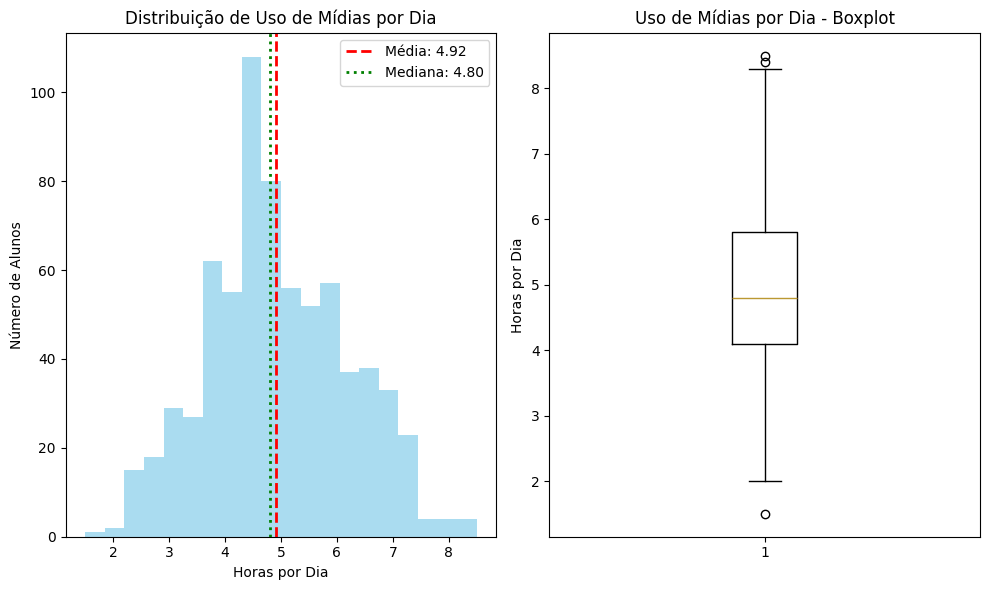

M√©dia de Uso de M√≠dias por Dia: 4.92 horas
Mediana de Uso de M√≠dias por Dia: 4.80 horas
M√°ximo de Uso de M√≠dias por Dia: 8.50 horas


In [2]:
import matplotlib.pyplot as plt

# Calcular estat√≠sticas
media = df['Avg_Daily_Usage_Hours'].mean()
mediana = df['Avg_Daily_Usage_Hours'].median()
maximo = df['Avg_Daily_Usage_Hours'].max()

plt.figure(figsize=(10, 6))

# Histograma
plt.subplot(1, 2, 1)
plt.hist(df['Avg_Daily_Usage_Hours'], bins=20, color='skyblue', alpha=0.7)
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'M√©dia: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='dotted', linewidth=2, label=f'Mediana: {mediana:.2f}')
plt.title('Distribui√ß√£o de Uso de M√≠dias por Dia')
plt.xlabel('Horas por Dia')
plt.ylabel('N√∫mero de Alunos')
plt.legend()

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(df['Avg_Daily_Usage_Hours'])
plt.title('Uso de M√≠dias por Dia - Boxplot')
plt.ylabel('Horas por Dia')

plt.tight_layout()
plt.show()

# Impress√£o das estat√≠sticas
print(f"M√©dia de Uso de M√≠dias por Dia: {media:.2f} horas")
print(f"Mediana de Uso de M√≠dias por Dia: {mediana:.2f} horas")
print(f"M√°ximo de Uso de M√≠dias por Dia: {maximo:.2f} horas")


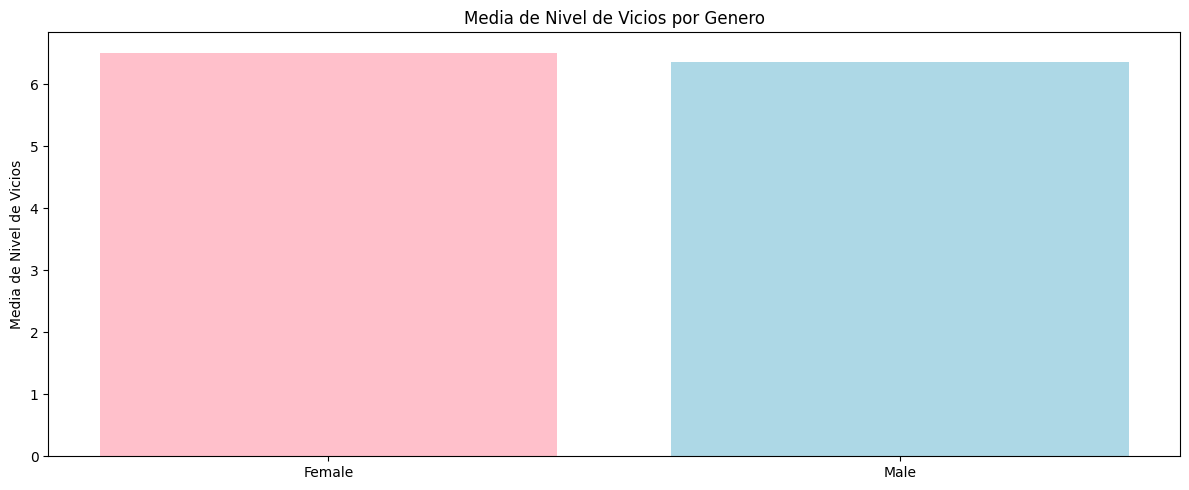

Nivel de Vicios por Genero:
        count      mean       std  min  25%  50%  75%  max
Gender                                                    
Female  353.0  6.515581  1.709070  3.0  5.0  7.0  8.0  9.0
Male    352.0  6.357955  1.452866  2.0  5.0  7.0  7.0  9.0


In [3]:
plt.figure(figsize=(12, 5))

gender_addiction = df.groupby('Gender')['Addicted_Score'].mean()
plt.bar(gender_addiction.index, gender_addiction.values, color=['pink', 'lightblue'])
plt.title('Media de Nivel de Vicios por Genero')
plt.ylabel('Media de Nivel de Vicios')

plt.tight_layout()
plt.show()

print("Nivel de Vicios por Genero:")
print(df.groupby('Gender')['Addicted_Score'].describe())


In [4]:
# Agrupar por g√™nero e calcular m√≠nimo e m√°ximo de uso di√°rio
resultados = df.groupby('Gender')['Avg_Daily_Usage_Hours'].agg(['min', 'max'])
resultados.reset_index()

Gender  min  max
0  Female  2.2  8.5
1    Male  1.5  7.5

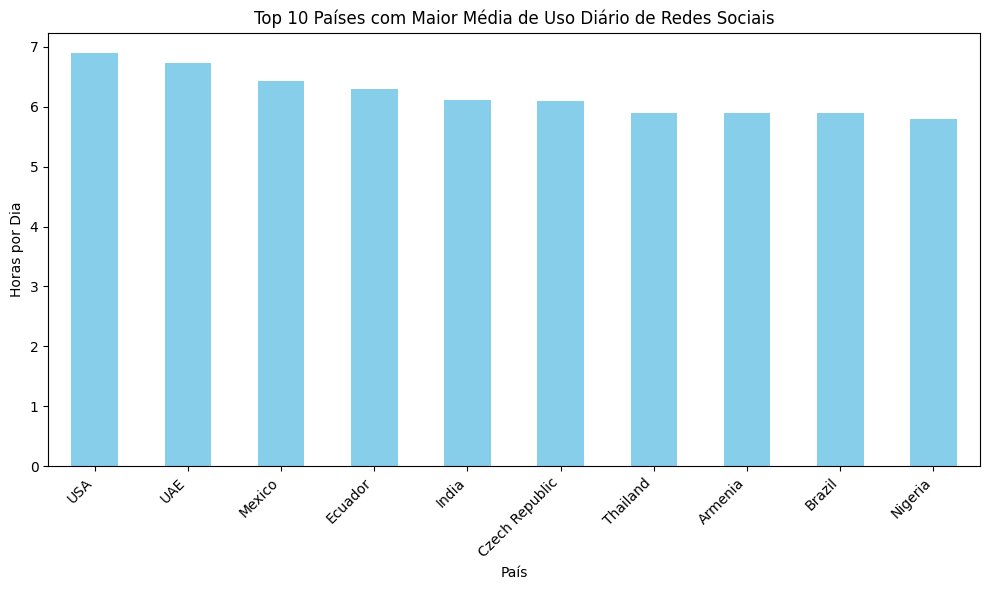

In [5]:
# Calcular m√©dia de horas por pa√≠s e pegar os 10 maiores
media_top10 = df.groupby('Country')['Avg_Daily_Usage_Hours'].mean().sort_values(ascending=False).head(10)

# Plotar gr√°fico de barras com os 10 maiores
plt.figure(figsize=(10, 6))
media_top10.plot(kind='bar', color='skyblue')

plt.title('Top 10 Pa√≠ses com Maior M√©dia de Uso Di√°rio de Redes Sociais')
plt.xlabel('Pa√≠s')
plt.ylabel('Horas por Dia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


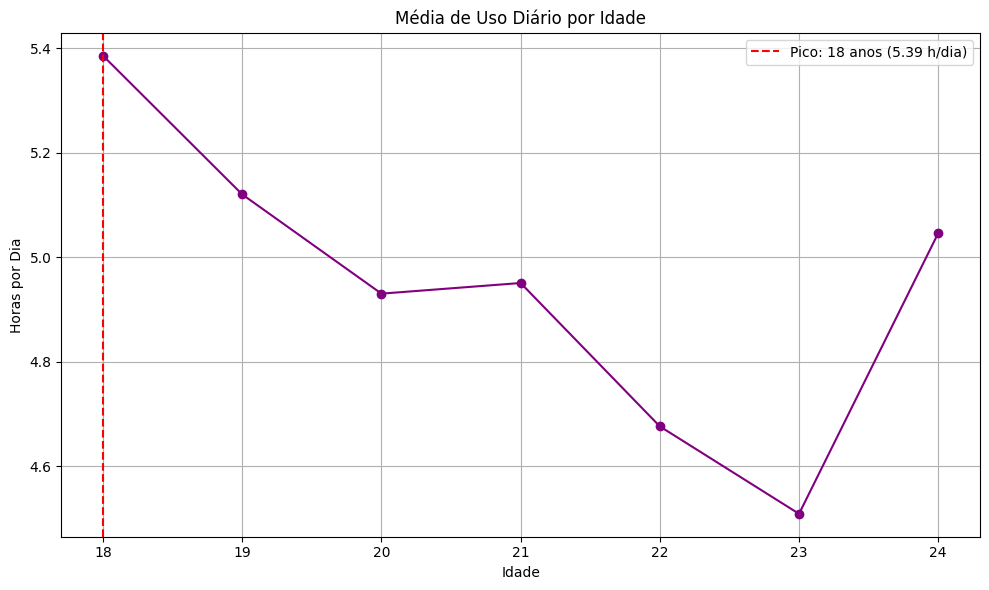

A maior m√©dia de uso ocorre na idade de 18 anos, com 5.39 horas por dia.


In [6]:
# Agrupar por idade e calcular a m√©dia
media_por_idade = df.groupby('Age')['Avg_Daily_Usage_Hours'].mean()

# Encontrar a idade com maior m√©dia de uso
idade_pico = media_por_idade.idxmax()
uso_pico = media_por_idade.max()

# Plotar gr√°fico de linha
plt.figure(figsize=(10, 6))
plt.plot(media_por_idade.index, media_por_idade.values, marker='o', color='purple')
plt.title('M√©dia de Uso Di√°rio por Idade')
plt.xlabel('Idade')
plt.ylabel('Horas por Dia')
plt.grid(True)

# Marcar o pico de uso
plt.axvline(x=idade_pico, color='red', linestyle='--', label=f'Pico: {idade_pico} anos ({uso_pico:.2f} h/dia)')
plt.legend()

plt.tight_layout()
plt.show()

# Print extra opcional
print(f"A maior m√©dia de uso ocorre na idade de {idade_pico} anos, com {uso_pico:.2f} horas por dia.")

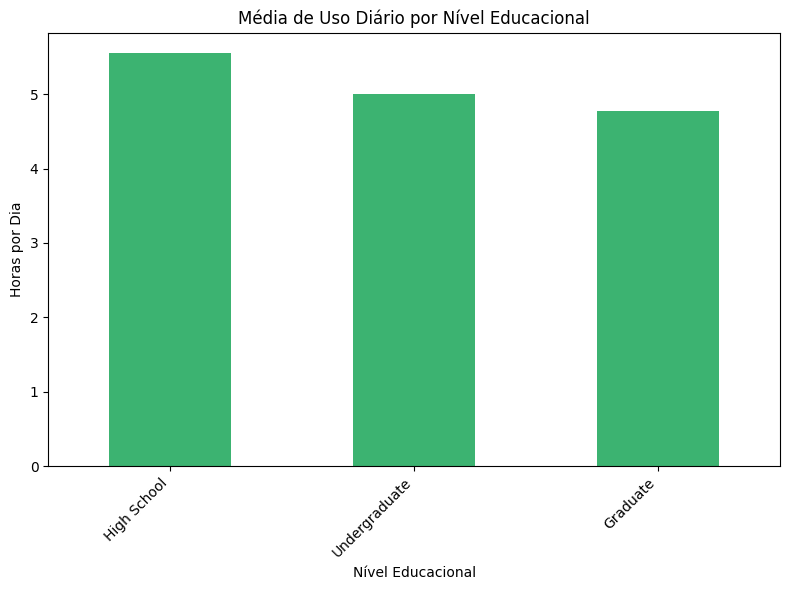

In [7]:
# Agrupar por Graduate e calcular a m√©dia de uso
media_por_educacao = df.groupby('Academic_Level')['Avg_Daily_Usage_Hours'].mean().sort_values(ascending=False)

# Plotar gr√°fico de barras
plt.figure(figsize=(8, 6))
media_por_educacao.plot(kind='bar', color='mediumseagreen')

plt.title('M√©dia de Uso Di√°rio por N√≠vel Educacional')
plt.xlabel('N√≠vel Educacional')
plt.ylabel('Horas por Dia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [8]:
df.head()

Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  Conflicts_Over_Social_Media  \
0                    6     In Relationship                            3   
1                    8              Single                            0   
2                    5         Complicated                            4   
3                    7              Single                            1   
4                    6     In Relationship                            2   

   Addicted_Score  
0               8  
1               3  
2               9  
3               4  
4               7

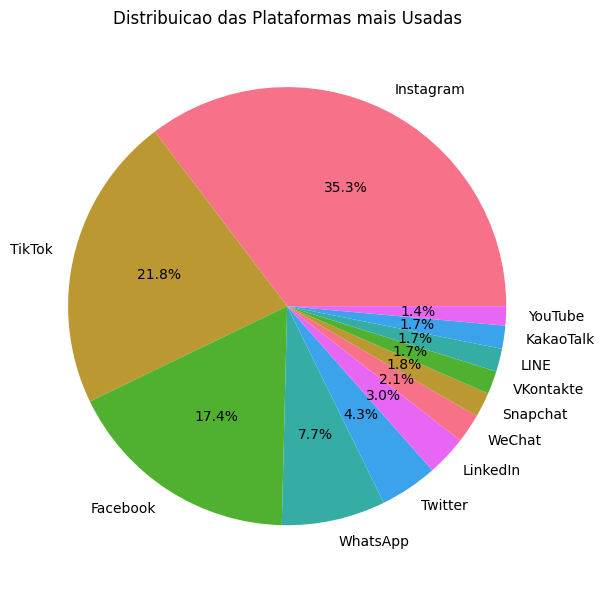

Estatisticas de uso das plataformas:
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64


In [9]:
plt.figure(figsize=(12, 6))

platform_counts = df['Most_Used_Platform'].value_counts()
plt.pie(platform_counts.values, labels=platform_counts.index, autopct='%1.1f%%')
plt.title('Distribuicao das Plataformas mais Usadas')

plt.tight_layout()
plt.show()

print("Estatisticas de uso das plataformas:")
print(platform_counts)


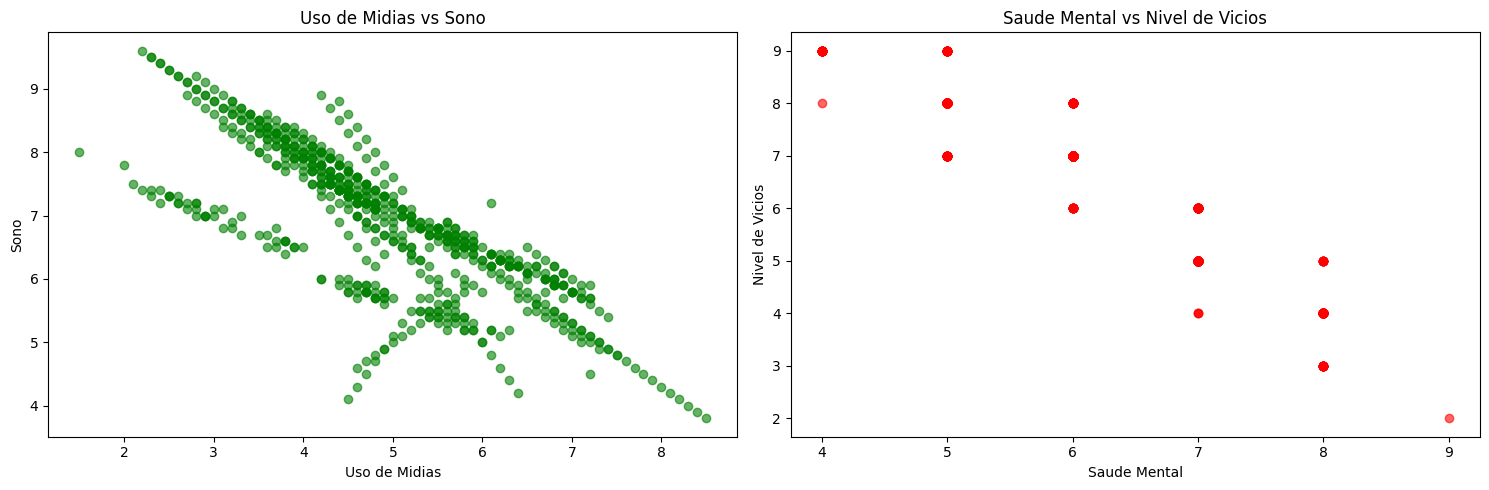

Correlacoes:
Uso de Midias vs Sono: -0.791
Saude Mental vs Nivel de Vicios: -0.945


In [ ]:
plt.figure(figsize=(15, 5))

# Uso de Midias vs Sono
plt.subplot(1, 2, 1)
plt.scatter(df['Avg_Daily_Usage_Hours'], d f['Sleep_Hours_Per_Night'], alpha=0.6, color='green')
plt.xlabel('Uso de Midias')
plt.ylabel('Sono')
plt.title('Uso de Midias vs Sono')

# Mental Health vs Nivel de Vicios
plt.subplot(1, 2, 2)
plt.scatter(df['Mental_Health_Score'], df['Addicted_Score'], alpha=0.6, color='red')
plt.xlabel('Saude Mental')
plt.ylabel('Nivel de Vicios')
plt.title('Saude Mental vs Nivel de Vicios')

plt.tight_layout()
plt.show()

# Correlacoes
print("Correlacoes:")
print(f"Uso de Midias vs Sono: {df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night']):.3f}")
print(f"Saude Mental vs Nivel de Vicios: {df['Mental_Health_Score'].corr(df['Addicted_Score']):.3f}")


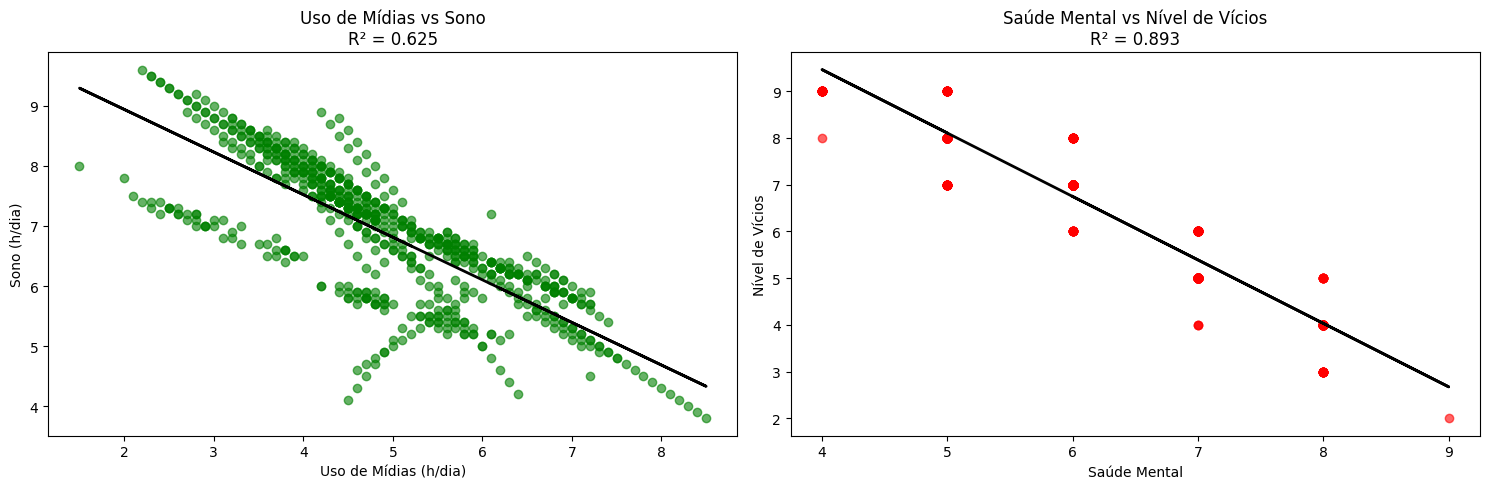

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. Uso de M√≠dias vs Sono
X1 = df['Avg_Daily_Usage_Hours'].values.reshape(-1, 1)
y1 = df['Sleep_Hours_Per_Night'].values

modelo1 = LinearRegression()
modelo1.fit(X1, y1)
y1_pred = modelo1.predict(X1)
r2_1 = r2_score(y1, y1_pred)

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.scatter(X1, y1, color='green', alpha=0.6)
plt.plot(X1, y1_pred, color='black', linewidth=2)
plt.title(f'Uso de M√≠dias vs Sono\nR¬≤ = {r2_1:.3f}')
plt.xlabel('Uso de M√≠dias (h/dia)')
plt.ylabel('Sono (h/dia)')

X2 = df['Mental_Health_Score'].values.reshape(-1, 1)
y2 = df['Addicted_Score'].values

modelo2 = LinearRegression()
modelo2.fit(X2, y2)
y2_pred = modelo2.predict(X2)
r2_2 = r2_score(y2, y2_pred)

plt.subplot(1, 2, 2)
plt.scatter(X2, y2, color='red', alpha=0.6)
plt.plot(X2, y2_pred, color='black', linewidth=2)
plt.title(f'Sa√∫de Mental vs N√≠vel de V√≠cios\nR¬≤ = {r2_2:.3f}')
plt.xlabel('Sa√∫de Mental')
plt.ylabel('N√≠vel de V√≠cios')

plt.tight_layout()
plt.show()


### üìä An√°lise dos Resultados das Regress√µes Lineares

#### **1. Uso de M√≠dias vs Sono**
- **R¬≤ = 0.625**: Aproximadamente **62,5% da varia√ß√£o nas horas de sono** pode ser explicada pelo **uso di√°rio de m√≠dias sociais**.
- A rela√ß√£o √© **negativa**: quanto maior o tempo gasto em m√≠dias sociais, menor tende a ser o tempo de sono.
- Apesar de boa, essa explica√ß√£o n√£o √© completa ‚Äî outros fatores (como estresse, rotina e sa√∫de f√≠sica) tamb√©m afetam o sono.

#### **2. Sa√∫de Mental vs N√≠vel de V√≠cios**
- **R¬≤ = 0.893**: Um valor elevado que indica que **89,3% da varia√ß√£o no n√≠vel de v√≠cios** pode ser explicada pela **sa√∫de mental**.
- A correla√ß√£o tamb√©m √© **negativa**: pessoas com melhor sa√∫de mental apresentam n√≠veis mais baixos de v√≠cio.
- Isso mostra uma rela√ß√£o forte e consistente entre os dois fatores.

---

### ‚úÖ Conclus√µes Gerais
- Ambas as regress√µes revelam **rela√ß√µes inversamente proporcionais**:
  - **Maior uso de m√≠dias ‚Üí menos horas de sono**.
  - **Melhor sa√∫de mental ‚Üí menor n√≠vel de v√≠cios**.
- O modelo de regress√£o linear √© especialmente explicativo no segundo caso (v√≠cios vs sa√∫de mental), o que refor√ßa a import√¢ncia de **promover bem-estar psicol√≥gico** e **reduzir o uso excessivo de m√≠dias** para uma vida mais equilibrada.


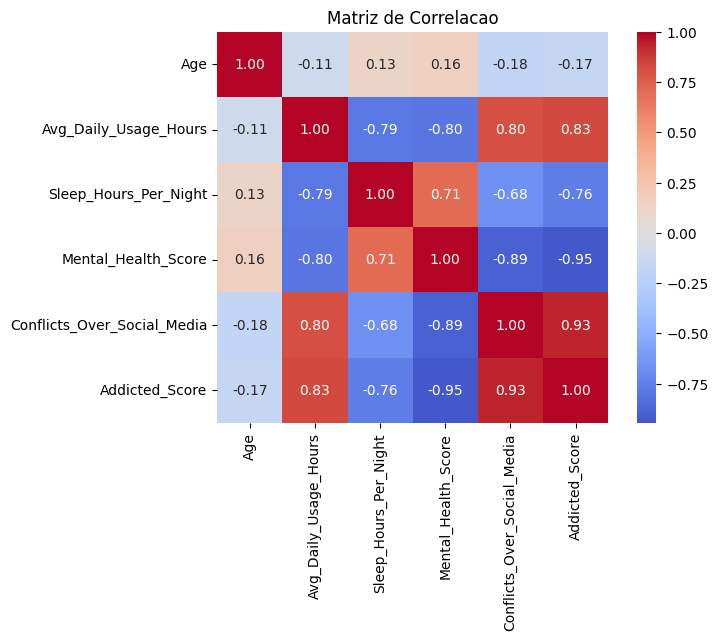

In [ ]:
plt.figure(figsize=(14, 6))

# Correlacao entre as variaveis numericas
plt.subplot(1, 2, 2)
numerical_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                  'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Matriz de Correlacao')

plt.tight_layout()
plt.show()



## O que podemos tirar dessa an√°lise inicial?

Observamos de forma visual que h√° sim influ√™ncia (Correla√ß√£o) entre os fatores. Em algumas visualiza√ß√µes estas caracter√≠sticas ficam bem claras, quando observamos o plot de horas de sono vs horas de uso de m√≠dias sociais vemos que claramente n√£o h√° uma distribui√ß√£o aleat√≥ria, e existe sim uma rela√ß√£o entre estes fatores. An√°lises pr√©vias como estas nos possibilitam criar hip√≥teses com maior rigor do que apenas existe ou n√£o existe correla√ß√£o. 

Seguindo adiante vamos expandir estas hip√≥teses e por meio da infer√™ncia estat√≠stica analisar se estas est√£o certas ou n√£o. Devemos sempre lembrar que estamos buscando, por meio de dados coletados de um grupo de pessoas, entender e generalizar o comportamento da sociedade como um todo. Buscamos identificar padr√µes dentro desta amostra e esperamos que eles possam ser refletidos para a popula√ß√£o em geral.

# ____________________________________________________

## Teste Qui-Quadrado

O teste qui-quadrado √© uma ferramenta fundamental da infer√™ncia estat√≠stica que nos permite investigar se existe associa√ß√£o significativa entre duas vari√°veis categ√≥ricas. Esta t√©cnica √© especialmente valiosa quando trabalhamos com dados qualitativos, como g√™nero, prefer√™ncias, status de relacionamento, ou qualquer vari√°vel que possa ser classificada em categorias distintas.

O princ√≠pio por tr√°s do teste qui-quadrado baseia-se na compara√ß√£o entre as frequ√™ncias observadas em nossa amostra e as frequ√™ncias que esperar√≠amos encontrar se n√£o houvesse associa√ß√£o entre as vari√°veis (hip√≥tese nula). Quando essas diferen√ßas s√£o grandes o suficiente, podemos concluir estatisticamente que existe uma associa√ß√£o real entre as vari√°veis na popula√ß√£o.

Este teste √© extremamente √∫til em nosso contexto de an√°lise de v√≠cio em redes sociais, pois muitas das vari√°veis em nosso dataset s√£o categ√≥ricas: g√™nero, n√≠vel acad√™mico, status de relacionamento, plataforma mais usada, e at√© mesmo se h√° impacto na performance acad√™mica. Por meio do teste qui-quadrado, podemos verificar cientificamente se vari√°veis como g√™nero t√™m associa√ß√£o com o impacto nas notas, ou se o status de relacionamento est√° relacionado com conflitos por causa das redes sociais.

A implementa√ß√£o do teste qui-quadrado em Python √© facilitada pela biblioteca SciPy, que integra perfeitamente com nossos DataFrames do Pandas, permitindo an√°lises estat√≠sticas robustas com poucas linhas de c√≥digo.


# ____________________________________________________


## Prepara√ß√£o dos Dados e Metodologia do Teste

**Problema da Categoriza√ß√£o:**
Para aplicar o teste qui-quadrado, precisamos de duas vari√°veis categ√≥ricas. Temos `Affects_Academic_Performance` (Sim/N√£o) como vari√°vel categ√≥rica, mas `Avg_Daily_Usage_Hours` √© uma vari√°vel cont√≠nua (valores num√©ricos de 0 a 8.5 horas). Por isso, precisamos transformar as horas de uso em categorias.

**Como Criamos os Grupos:**
Utilizamos uma abordagem baseada em **percentis** para dividir os estudantes em tr√™s grupos equilibrados:
- **Baixo Uso**: estudantes no ter√ßo inferior (33% menores valores)
- **Uso Moderado**: estudantes no ter√ßo intermedi√°rio (33% valores m√©dios)  
- **Alto Uso**: estudantes no ter√ßo superior (33% maiores valores)

Esta divis√£o garante que cada grupo tenha aproximadamente o mesmo n√∫mero de estudantes, evitando grupos muito pequenos que poderiam comprometer a validade do teste.

**O que Estamos Testando:**
Queremos verificar se existe uma **associa√ß√£o sistem√°tica** entre o n√≠vel de uso de m√≠dias sociais e o relato de impacto na performance acad√™mica. Especificamente:
- Ser√° que estudantes com alto uso reportam mais frequentemente impacto negativo nas notas?
- Esta diferen√ßa √© estatisticamente significativa ou pode ser apenas casualidade?

**Como o Qui-Quadrado Funciona:**
O teste compara as **frequ√™ncias observadas** (o que realmente encontramos na amostra) com as **frequ√™ncias esperadas** (o que esperar√≠amos se n√£o houvesse associa√ß√£o). Se a diferen√ßa for grande o suficiente, conclu√≠mos que existe associa√ß√£o real na popula√ß√£o. O c√°lculo considera:

1. **Hip√≥tese Nula (H‚ÇÄ):** Uso de m√≠dias e impacto acad√™mico s√£o independentes
2. **Estat√≠stica œá¬≤:** Mede o quanto os dados observados se desviam do esperado sob H‚ÇÄ
3. **Valor-p:** Probabilidade de obter resultados t√£o extremos quanto os observados, assumindo H‚ÇÄ verdadeira


In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

# Exemplo pr√°tico: Teste qui-quadrado entre Horas de Uso de M√≠dias Sociais e Impacto na Performance Acad√™mica
print("=== TESTE QUI-QUADRADO: Uso de M√≠dias Sociais vs Impacto na Performance Acad√™mica ===\n")

# Vamos criar categorias baseadas em quartis para ter uma distribui√ß√£o equilibrada
quartiles = df['Avg_Daily_Usage_Hours'].quantile([0.33, 0.67])
print("Distribui√ß√£o das horas de uso:")
print(f"Q1 (33%): {quartiles[0.33]:.1f} horas")
print(f"Q2 (67%): {quartiles[0.67]:.1f} horas")
print()

# Categorizando as horas de uso
def categorize_usage(hours):
    if hours <= quartiles[0.33]:
        return 'Baixo Uso'
    elif hours <= quartiles[0.67]:
        return 'Uso Moderado' 
    else:
        return 'Alto Uso'

df['Usage_Category'] = df['Avg_Daily_Usage_Hours'].apply(categorize_usage)

# Verificando a distribui√ß√£o das categorias
print("Distribui√ß√£o por categoria de uso:")
print(df['Usage_Category'].value_counts())
print()

# Criando a tabela de conting√™ncia
contingency_table = pd.crosstab(df['Usage_Category'], df['Affects_Academic_Performance'])
print("Tabela de Conting√™ncia:")
print(contingency_table)
print()

# Realizando o teste qui-quadrado
chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)

print("Resultados do Teste Qui-Quadrado:")
print(f"Estat√≠stica Qui-quadrado: {chi2_stat:.4f}")
print(f"Valor-p: {p_value}")
print(f"Graus de liberdade: {dof}")
print()



=== TESTE QUI-QUADRADO: Uso de M√≠dias Sociais vs Impacto na Performance Acad√™mica ===

Distribui√ß√£o das horas de uso:
Q1 (33%): 4.4 horas
Q2 (67%): 5.5 horas

Distribui√ß√£o por categoria de uso:
Usage_Category
Baixo Uso       259
Uso Moderado    227
Alto Uso        219
Name: count, dtype: int64

Tabela de Conting√™ncia:
Affects_Academic_Performance   No  Yes
Usage_Category                        
Alto Uso                        0  219
Baixo Uso                     191   68
Uso Moderado                   61  166

Resultados do Teste Qui-Quadrado:
Estat√≠stica Qui-quadrado: 292.4468
Valor-p: 3.1332497373356823e-64
Graus de liberdade: 2



In [ ]:
# Interpreta√ß√£o dos resultados
alpha = 0.10

print(f"N√≠vel de signific√¢ncia (Œ±): {alpha}")
if p_value < alpha:
    print("‚úÖ CONCLUS√ÉO: Rejeitamos a hip√≥tese nula")
    print("   Existe associa√ß√£o significativa entre Uso de M√≠dias Sociais e Impacto na Performance Acad√™mica")
else:
    print("‚ùå CONCLUS√ÉO: N√£o rejeitamos a hip√≥tese nula")
    print("   N√£o h√° evid√™ncia suficiente de associa√ß√£o entre Uso de M√≠dias Sociais e Impacto na Performance Acad√™mica")

print()
print("Frequ√™ncias Esperadas (sob hip√≥tese nula):")
expected_df = pd.DataFrame(expected_freq, 
                          index=contingency_table.index, 
                          columns=contingency_table.columns)
print(expected_df.round(2))

N√≠vel de signific√¢ncia (Œ±): 0.1
‚úÖ CONCLUS√ÉO: Rejeitamos a hip√≥tese nula
   Existe associa√ß√£o significativa entre Uso de M√≠dias Sociais e Impacto na Performance Acad√™mica

Frequ√™ncias Esperadas (sob hip√≥tese nula):
Affects_Academic_Performance     No     Yes
Usage_Category                             
Alto Uso                      78.28  140.72
Baixo Uso                     92.58  166.42
Uso Moderado                  81.14  145.86



# ____________________________________________________
## Interpreta√ß√£o e Aplica√ß√£o do Teste Qui-Quadrado

O exemplo acima demonstra como o teste qui-quadrado nos permite verificar cientificamente se existe uma associa√ß√£o real entre duas vari√°veis categ√≥ricas em nossa popula√ß√£o de interesse. Note que precisamos categorizar a vari√°vel cont√≠nua de horas de uso para aplicar este teste, criando grupos de "Baixo Uso", "Uso Moderado" e "Alto Uso".

**Hip√≥teses Testadas:**
- **H‚ÇÄ (Hip√≥tese Nula):** N√£o existe associa√ß√£o entre categoria de uso de m√≠dias sociais e impacto na performance acad√™mica
- **H‚ÇÅ (Hip√≥tese Alternativa):** Existe associa√ß√£o significativa entre essas vari√°veis

**Como Interpretar os Resultados:**

O **valor-p** foi extremamente pequeno, isso significa que existe uma associa√ß√£o quase perfeita entre uso de m√≠dias sociais e impacto acad√™mico nos dados.

# ____________________________________________________

# Teste Qui-Quadrado para Status de Relacionamento vs Uso de M√≠dias Sociais
 
Desta vez vamos realizar o teste qui-quadrado para verificar se existe rela√ß√£o entre o status de relacionamento e o uso de m√≠dias sociais, para isso vamos criar H0: N√£o existe rela√ß√£o e H1: Existe rela√ß√£o. 
 
Para nossa an√°lise vamos plotar as distribui√ß√µes de status de relacionamento, dividindo nas 3 categorias dos dados (Single, Relationship, Complicated) e dentro destas criar quartis de uso de m√≠dias sociais.

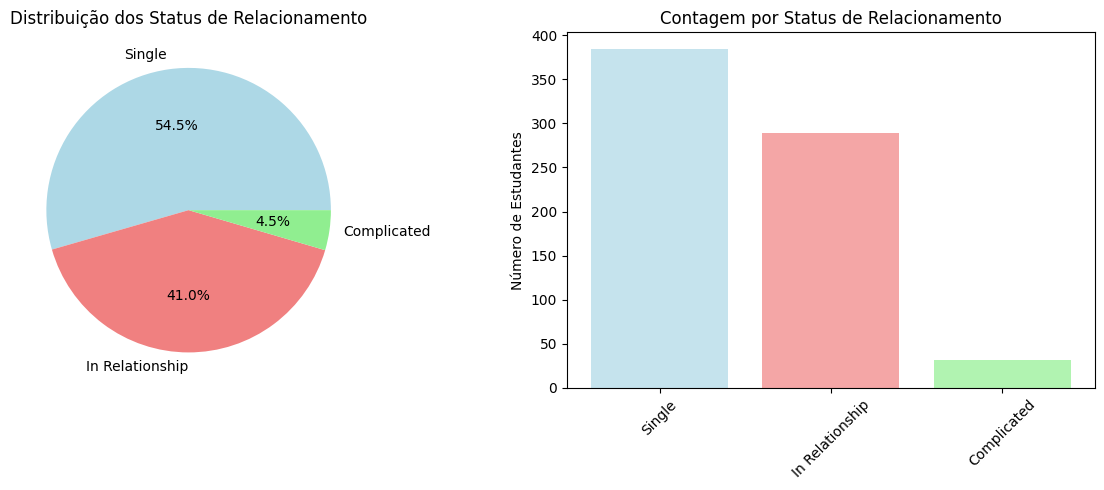

Status de Relacionamento - Estat√≠sticas:
Relationship_Status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64

Total de estudantes: 705


In [ ]:

# üìä An√°lise do Status de Relacionamento vs Outros Par√¢metros

# Primeiro, vamos ver a distribui√ß√£o dos status de relacionamento
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
relationship_counts = df['Relationship_Status'].value_counts()
colors = ['lightblue', 'lightcoral', 'lightgreen']
plt.pie(relationship_counts.values, labels=relationship_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribui√ß√£o dos Status de Relacionamento')

plt.subplot(1, 2, 2)
plt.bar(relationship_counts.index, relationship_counts.values, color=colors, alpha=0.7)
plt.title('Contagem por Status de Relacionamento')
plt.ylabel('N√∫mero de Estudantes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

print("Status de Relacionamento - Estat√≠sticas:")
print(relationship_counts)
print(f"\nTotal de estudantes: {len(df)}")

üìã Tabela de Conting√™ncia:
Status de Relacionamento vs Categoria de Uso Di√°rio
Usage_Category       Alto Uso  Baixo Uso  Uso Moderado
Relationship_Status                                   
Complicated                 9         11            12
In Relationship            77        105           107
Single                    133        143           108


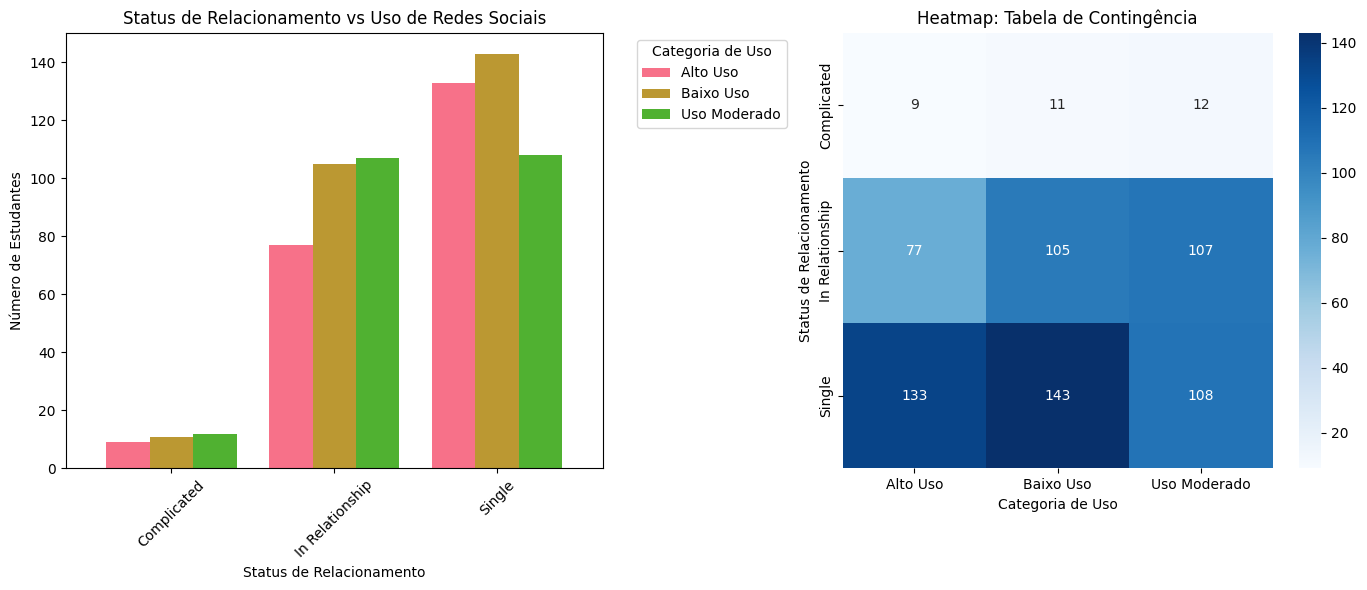


üìä Percentuais por Status de Relacionamento:
Usage_Category       Alto Uso  Baixo Uso  Uso Moderado
Relationship_Status                                   
Complicated             28.12      34.38         37.50
In Relationship         26.64      36.33         37.02
Single                  34.64      37.24         28.12


In [ ]:

# üìä Tabela de Conting√™ncia e Visualiza√ß√£o

# Criar tabela de conting√™ncia
contingency_table = pd.crosstab(df['Relationship_Status'], df['Usage_Category'])
print("üìã Tabela de Conting√™ncia:")
print("Status de Relacionamento vs Categoria de Uso Di√°rio")
print(contingency_table)

# Visualizar a tabela de conting√™ncia
plt.figure(figsize=(14, 6))

# Gr√°fico de barras agrupadas
plt.subplot(1, 2, 1)
contingency_table.plot(kind='bar', ax=plt.gca(), width=0.8)
plt.title('Status de Relacionamento vs Uso de Redes Sociais')
plt.xlabel('Status de Relacionamento')
plt.ylabel('N√∫mero de Estudantes')
plt.legend(title='Categoria de Uso', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# Heatmap da tabela de conting√™ncia
plt.subplot(1, 2, 2)
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap: Tabela de Conting√™ncia')
plt.ylabel('Status de Relacionamento')
plt.xlabel('Categoria de Uso')

plt.tight_layout()
plt.show()

# Calcular percentuais por linha (status de relacionamento)
contingency_percent = pd.crosstab(df['Relationship_Status'], df['Usage_Category'], normalize='index') * 100
print(f"\nüìä Percentuais por Status de Relacionamento:")
print(contingency_percent.round(2))

In [ ]:

# üß™ Teste Qui-Quadrado: Status de Relacionamento vs Uso Di√°rio de Redes Sociais

from scipy.stats import chi2_contingency
from scipy.stats import chi2

# Primeiro, vamos categorizar o uso di√°rio em grupos
# Vamos usar quartis para criar categorias equilibradas
usage_quartiles = df['Avg_Daily_Usage_Hours'].quantile([0.25, 0.5, 0.75])
print("Quartis do uso di√°rio de redes sociais:")
print(f"Q1 (25%): {usage_quartiles[0.25]:.2f} horas")
print(f"Q2 (50%): {usage_quartiles[0.5]:.2f} horas")
print(f"Q3 (75%): {usage_quartiles[0.75]:.2f} horas")

# Criar categorias baseadas nos quartis
def categorize_usage(hours):
    if hours <= usage_quartiles[0.25]:
        return 'Baixo (‚â§Q1)'
    elif hours <= usage_quartiles[0.5]:
        return 'Moderado (Q1-Q2)'
    elif hours <= usage_quartiles[0.75]:
        return 'Alto (Q2-Q3)'
    else:
        return 'Muito Alto (>Q3)'

df['Usage_Category'] = df['Avg_Daily_Usage_Hours'].apply(categorize_usage)

print(f"\nDistribui√ß√£o das categorias de uso:")
print(df['Usage_Category'].value_counts().sort_index())

Quartis do uso di√°rio de redes sociais:
Q1 (25%): 4.10 horas
Q2 (50%): 4.80 horas
Q3 (75%): 5.80 horas

Distribui√ß√£o das categorias de uso:
Usage_Category
Alto (Q2-Q3)        165
Baixo (‚â§Q1)         186
Moderado (Q1-Q2)    191
Muito Alto (>Q3)    163
Name: count, dtype: int64


In [ ]:

# üî¨ Teste Qui-Quadrado de Independ√™ncia

# Executar o teste qui-quadrado
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Calcular o valor cr√≠tico para Œ± = 0.05
alpha = 0.05
critical_value = chi2.ppf(1 - alpha, dof)

print("üî¨ RESULTADOS DO TESTE QUI-QUADRADO")
print("=" * 50)
print(f"Estat√≠stica Qui-Quadrado (œá¬≤): {chi2_stat:.4f}")
print(f"Valor p: {p_value:.6f}")
print(f"Graus de liberdade: {dof}")
print(f"Valor cr√≠tico (Œ± = 0.05): {critical_value:.4f}")

print(f"\nüìã Valores Esperados (sob H‚ÇÄ de independ√™ncia):")
expected_df = pd.DataFrame(expected, 
                          index=contingency_table.index, 
                          columns=contingency_table.columns)
print(expected_df.round(2))

print(f"\nüéØ INTERPRETA√á√ÉO DOS RESULTADOS:")
print("=" * 50)

# Hip√≥teses
print(f"H‚ÇÄ: Status de relacionamento e uso de redes sociais s√£o INDEPENDENTES")
print(f"H‚ÇÅ: Status de relacionamento e uso de redes sociais N√ÉO s√£o independentes")

# Conclus√£o baseada no p-valor
if p_value < alpha:
    conclusion = "REJEITAMOS H‚ÇÄ"
    relationship = "EXISTE associa√ß√£o significativa"
    strength = "estatisticamente significativa"
else:
    conclusion = "N√ÉO rejeitamos H‚ÇÄ"
    relationship = "N√ÉO existe evid√™ncia de associa√ß√£o"
    strength = "n√£o significativa"

print(f"\n‚úÖ CONCLUS√ÉO:")
print(f"‚Ä¢ Com Œ± = {alpha}, {conclusion}")
print(f"‚Ä¢ {relationship} entre status de relacionamento e uso de redes sociais")
print(f"‚Ä¢ A associa√ß√£o √© {strength} (p = {p_value:.6f})")

# Calcular Phi (medida de associa√ß√£o para qui-quadrado)
n = contingency_table.sum().sum()
phi = np.sqrt(chi2_stat / n)
print(f"‚Ä¢ Coeficiente Phi (for√ßa da associa√ß√£o): {phi:.4f}")


üî¨ RESULTADOS DO TESTE QUI-QUADRADO
Estat√≠stica Qui-Quadrado (œá¬≤): 7.9199
Valor p: 0.094556
Graus de liberdade: 4
Valor cr√≠tico (Œ± = 0.05): 9.4877

üìã Valores Esperados (sob H‚ÇÄ de independ√™ncia):
Usage_Category       Alto Uso  Baixo Uso  Uso Moderado
Relationship_Status                                   
Complicated              9.94      11.76         10.30
In Relationship         89.77     106.17         93.05
Single                 119.29     141.07        123.64

üéØ INTERPRETA√á√ÉO DOS RESULTADOS:
H‚ÇÄ: Status de relacionamento e uso de redes sociais s√£o INDEPENDENTES
H‚ÇÅ: Status de relacionamento e uso de redes sociais N√ÉO s√£o independentes

‚úÖ CONCLUS√ÉO:
‚Ä¢ Com Œ± = 0.05, N√ÉO rejeitamos H‚ÇÄ
‚Ä¢ N√ÉO existe evid√™ncia de associa√ß√£o entre status de relacionamento e uso de redes sociais
‚Ä¢ A associa√ß√£o √© n√£o significativa (p = 0.094556)
‚Ä¢ Coeficiente Phi (for√ßa da associa√ß√£o): 0.1060


# ___________________________________________
### Interpretanto Resultados

O teste qui-quadrado com um n√≠vel de signific√¢ncia de 5% n√£o mostra evid√™ncias para a associa√ß√£o do uso de redes sociais e status de relacionamento. Podemos observar no plot de status de relacionamento vs uso de m√≠dias sociais que a distribui√ß√£o entre pessoas que t√™m uso em cada um dos quartis √© parecida entre os 3 grupos de status de relacionamento.

# ___________________________________________